# Regression Trees

Regression tree is a type of decision tree used for predicting continous numericla values rather than categorical labels. It is a supervised learning algorith that splits the data into smaller subsets based on conditions that minimize the variance in the target variable.

How it works?
1. Splitting the data: The algorithm selects the best feature and split point that minimizes the error (typically Mean Squared Error, MSE).
2. Creating Branches: The data is divided into two or more subsets.
3. Repeating splitting: The process continuous recursively until a stopping condition is met (e.g., minimum no of samples in a leaf node).
4. Making predictions: Each leaf node contains a prediction, usually the mean of the target values in that node.

Key Features:
1. Handles non-linear relationships effectively
2. Interpretable model as decisions are made in a tree-like structure.
3. Can suffer from overfitting, which can be reduced using pruning or ensemble methods (Random Forest, Gradient Boosting).

Example - House prices based on factors like area, no of rooms, and location.

In this project we will use a real dataset to train a regression tree model. The dataset includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). We will use the trained model to predict the amount of tip paid.

### Objectives

1. Performe basic data preprocessing using Scikit-Learn
2. Model a regression task using Scikit-Learn
3. Train a Desicion Tree Regressor model
4. Run inference and assess the quality of the trained models.

### Introduction

The dataset used in this project is a subset of the publicly available TLC Dataset (all rights reserved vy Taxi & Limousine Commission (TLC), City of New York). The prediction of the tip amount can be modeled as a regression problem. To train the model we can use part of the input dataset and the remaining data can be used to assess the quality of the trained model.

In [2]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Dataset Analysis

In this project we will read the dataset in a pandas dataframe and visualize its content. We will also look at some data statistics.

Note: A pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.

In [3]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv')
df = pd.read_csv(url)
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


Each row in the dataset represents a taxi trip. As shown above, each row has 13 variables. One of the variables is `tip_amount` which will be the target variable. Our objective will be to train a model that uses the other variables to predict the value of the `tip_amount` variable.

To understand the dataset a little better, let us plot the correlation of the target variable against the input vasriables.

In [4]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')
correlation_values

VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

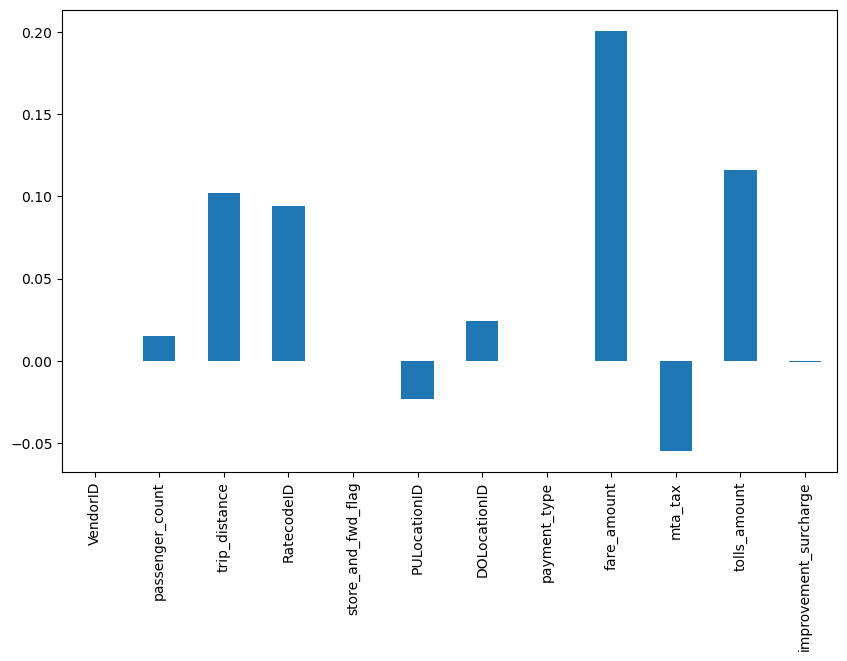

In [5]:
correlation_values.plot(kind = 'bar', figsize = (10,6))
plt.show()

This shows us that the input features `VendorID`, `store_and_fw_flag`, `payment_type`, and `improvement_surcharge` have little to no correlation with the target variable. 

### Data Preprocessing

We will now prepare the data for training by applying normalization to the input features.

In [6]:
#extract the data from the data frame
y = df[['tip_amount']].values.astype('float32')

#drop the target variable from the feature matrics
proc_data = df.drop(['tip_amount'], axis = 1)

# get the feature matrix used for training
X = proc_data.values

#normalize the feature matrics
X = normalize(X, axis = 1, norm = 'l1', copy = False)

what does `norm = l1` mean in the above code?

* `norm = l1` applies L1 normalization (also known as Manhattan Norm or Taxicab norm) to each row of `X`.
* It scales each row so that the sum of absolute values of the elements in that row equals 1.

### Dataset train, test and split

Now that the dataset is ready for building the classification models, we need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Build a Decision Tree Regressor model with Scikit-Learn

Regression Trees a re implemented using `DecisionTreeRegressor`.

The important parameter of the model are:
`criterion`: The function used to measure error, we use `squared_error`.
`max_depth`: The maximum depth the tree is allowed to tkae, we use 8.

In [8]:
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random state to a given intger value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 8, random_state = 35)

Now lets train our model using the `fit` method on the `DecisionTreeRegressor` object providing our training data.

In [9]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

### Evaluate the Scikit-Learn and snap ML Decision Tree Regression Models

To evaluate our dataset we will use the `score` method of the `DesicionTreeRegressor` object providing our testing data, this number is the R2 value which indicates the coefficient of determination. W ewill also evaluate the Mean Square Error (MSE) of the regression output with respect to the test set target values. High R2 and low MSE values are expected from a good regression model.

In [10]:
#run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

#evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE Score: {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test, y_test)
print('R2 Score: {0:.3f}'.format(r2_score))

MSE Score: 24.555
R2 Score: 0.028


What if we change the max-depth to 12? How would tje MSE and R2 be affected?

In [14]:
dt1_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 12, random_state = 35)
dt1_reg.fit(X_train, y_train)
y1_pred = dt1_reg.predict(X_test)
mse_score_1 = mean_squared_error(y_test, y1_pred)
print('MSE Score: {0: .3f}'. format(mse_score_1))

r2_score = dt1_reg.score(X_test, y_test)
print('R2 Score: {0: .3f}'.format(r2_score))

MSE Score:  26.459
R2 Score: -0.047


MSE is noted to be increased by increasing the max_depth of the tree. This may be because of the model having excessive parameters due to which it overfits to the training data, making the performance on the testing data poorer. Another important observation would be that the model gives a **negative** value of **R2**. This again indicates that the prediction model created does a very poor job predicting the values on a test set.

Identify the top 3 features with the most effect on the `tip-amount`

In [15]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending = False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

As is evident from the output, Fare amount, Toll amount, and trip distance are the top features affecting the tip amount, which make logical sense.

Since we identified 4 features which are not correlated with the target varriable, try removing these variables from the input set and see the effect on the MSE and R2 value.

In [19]:
df_modified = df.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis = 1)
y2 = df_modified[['tip_amount']].values.astype('float32')
proc1_data = df_modified.drop(['tip_amount'], axis = 1)
X2 = proc1_data.values
X2 = normalize(X2, axis = 1, norm = 'l1', copy = False)

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 35)
dt2_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 8, random_state = 35)
dt2_reg.fit(X2_train, y2_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

In [25]:
y2_pred = dt2_reg.predict(X2_test)
mse_score_2 = mean_squared_error(y2_test, y2_pred)
print('MSE Score: {0: .3f}'.format(mse_score_2))

r2_score2 = dt2_reg.score(X2_test, y2_test)
print('R2 Score: {0: .3f}'.format(r2_score2))

MSE Score:  24.393
R2 Score:  0.005


The MSE and R2 values doesnot change significantly, showing that there is minimal affect of these parameters on the final regression output.

let's check the effect by decreasing the `max-depth` parameter to 4 on the MSE and R2 values.

In [23]:
dt3_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 4, random_state = 35)
dt3_reg.fit(X2_train, y2_train)
y3_pred = dt3_reg.predict(X2_test)
mse_score_2 = mean_squared_error(y2_test, y3_pred)
print('MSE Score: {0: .3f}'.format(mse_score_2))

r2_score2 = dt2_reg.score(X2_test, y2_test)
print('R2 Score: {0: .3f}'.format(r2_score2))

MSE Score:  23.705
R2 Score:  0.033


We can notice that the MSE value decreased and R2 value increased, meaning that the choice of `max_depth = 4` may be more suitable for this dataset.